In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pokemon = pd.read_csv('Pokemon.csv')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


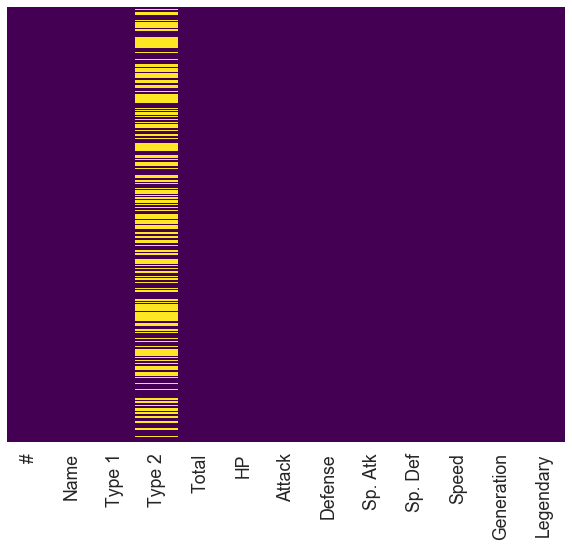

In [20]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(10,8))
sns.set_context(font_scale=1.3)
sns.heatmap(pokemon.isnull(),yticklabels=False,cbar=False, cmap='viridis')

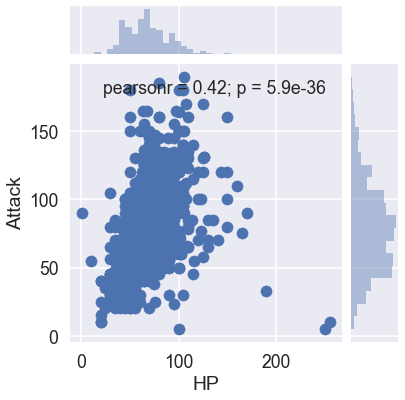

In [26]:
sns.jointplot(x="HP", y="Attack", data=pokemon)

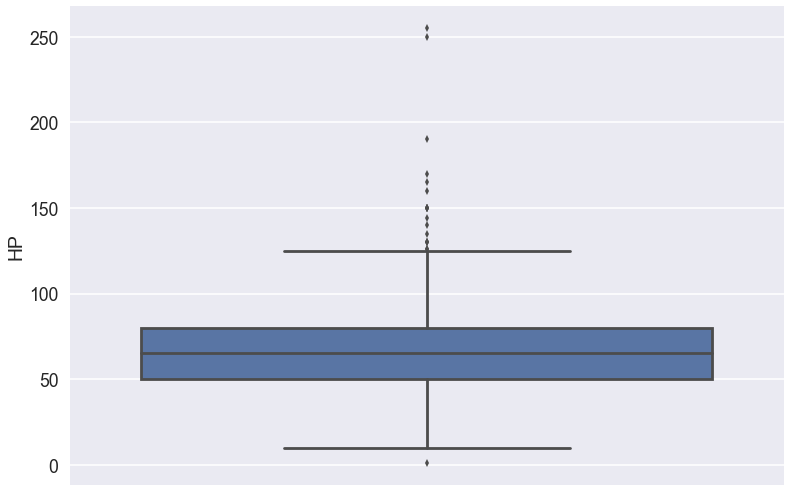

In [28]:
sns.boxplot(y="HP", data=pokemon);

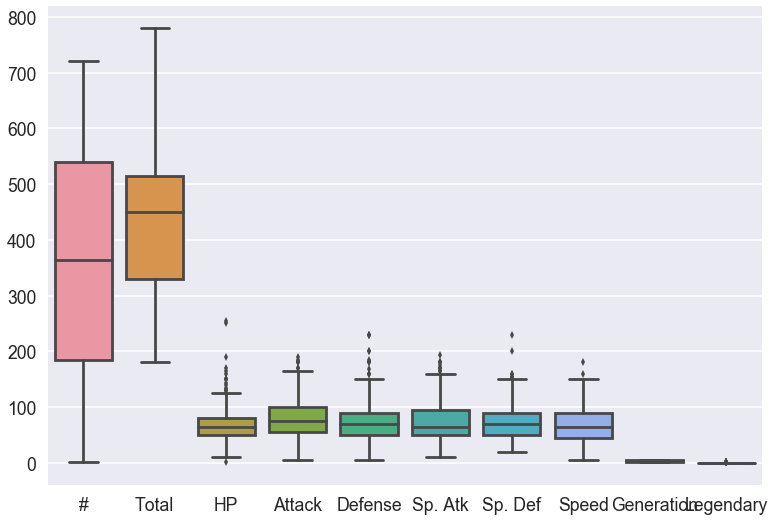

In [29]:
sns.boxplot(data=pokemon);

In [7]:
pokemon.rename(columns={'Type 1': 'Type'}, inplace=True)

In [8]:
pokemon.drop(['Type 2','#','Name'], axis=1,inplace=True)

In [9]:
pokemon.head()

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False


In [10]:
pokemon.Type.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [11]:
pokemon['Type']=pd.factorize(pokemon['Type'])[0]

In [12]:
pokemon.head()

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,318,45,49,49,65,65,45,1,False
1,0,405,60,62,63,80,80,60,1,False
2,0,525,80,82,83,100,100,80,1,False
3,0,625,80,100,123,122,120,80,1,False
4,1,309,39,52,43,60,50,65,1,False


In [13]:
#pokemon[['Type', 'Legendary']].groupby(['Type'], as_index=False).mean().sort_values(by='Legendary', ascending=False)

### Split Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = pokemon.drop('Legendary',axis=1)
y = pokemon['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32)

In [16]:
X.head(5)

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,0,318,45,49,49,65,65,45,1
1,0,405,60,62,63,80,80,60,1
2,0,525,80,82,83,100,100,80,1
3,0,625,80,100,123,122,120,80,1
4,1,309,39,52,43,60,50,65,1


In [17]:
y.head(5)

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression()

In [20]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
logistic_predictions = logreg.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
logreg.score(X_test, y_test)

0.94140625

In [24]:
print(confusion_matrix(y_test,logistic_predictions))

[[237   2]
 [ 13   4]]


In [25]:
print(classification_report(y_test,logistic_predictions))

             precision    recall  f1-score   support

      False       0.95      0.99      0.97       239
       True       0.67      0.24      0.35        17

avg / total       0.93      0.94      0.93       256



### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=160)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=160, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(rfc.score(X_test, y_test))
print("-"*60)
print(confusion_matrix(y_test,rfc_pred))
print("-"*60)
print(classification_report(y_test,rfc_pred))      

0.95703125
------------------------------------------------------------
[[230   9]
 [  2  15]]
------------------------------------------------------------
             precision    recall  f1-score   support

      False       0.99      0.96      0.98       239
       True       0.62      0.88      0.73        17

avg / total       0.97      0.96      0.96       256



### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
dtree_predictions = dtree.predict(X_test)

In [35]:
print(dtree.score(X_test, y_test))
print("-"*60)
print(confusion_matrix(y_test,dtree_predictions))
print("-"*60)
print(classification_report(y_test,dtree_predictions))

0.98046875
------------------------------------------------------------
[[234   5]
 [  0  17]]
------------------------------------------------------------
             precision    recall  f1-score   support

      False       1.00      0.98      0.99       239
       True       0.77      1.00      0.87        17

avg / total       0.98      0.98      0.98       256



### K Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=2)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [39]:
knn_predictions = knn.predict(X_test)

In [40]:
print(knn.score(X_test, y_test))
print("-"*60)
print(confusion_matrix(y_test,knn_predictions))
print("-"*60)
print(classification_report(y_test,knn_predictions))

0.9609375
------------------------------------------------------------
[[235   4]
 [  6  11]]
------------------------------------------------------------
             precision    recall  f1-score   support

      False       0.98      0.98      0.98       239
       True       0.73      0.65      0.69        17

avg / total       0.96      0.96      0.96       256



In [41]:
### Choosing K Value

In [42]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

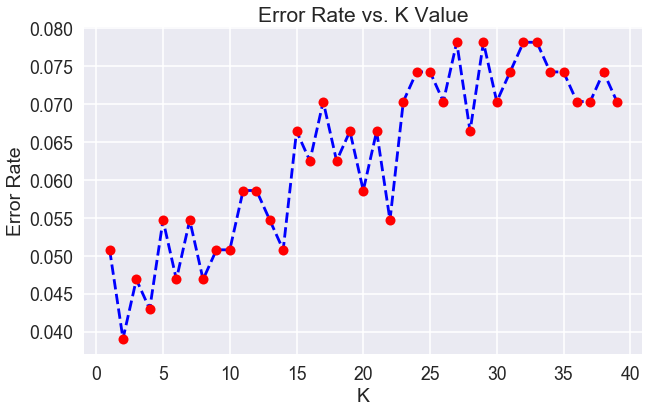

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [3]:
pokemon.jointplot(x="HP", y="Attack", data=pkmn);

NameError: name 'pokemon' is not defined